In [1]:
from __future__ import print_function
import time
import numpy as np
import matplotlib.pyplot as plt
from data_utils import *
from scipy import flip
import random
from sklearn.utils import shuffle
from sklearn.externals import joblib
import os
## Classes 

from Softmax import *
from FCHiddenLayer import *
from ConvNeurons import *
from ConvLayers import *

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Before Augmentation


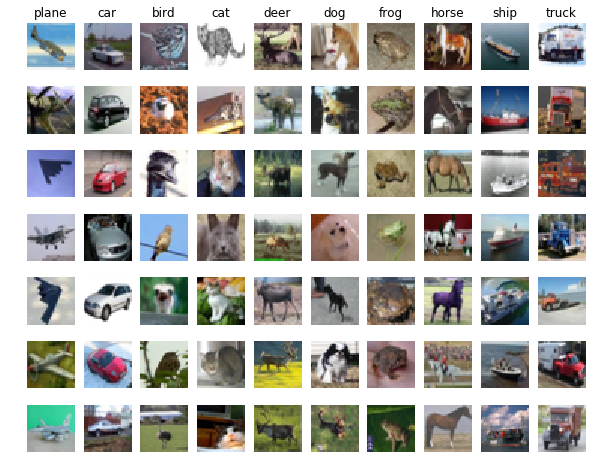

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Training data shape:  (49000, 3, 32, 32)
Training labels shape:  (49000,)
Test data shape:  (10000, 3, 32, 32)
Test labels shape:  (10000,)
(49000, 3, 32, 32)


In [3]:
# Load the raw CIFAR-10 data.
cifar10_dir = './cifar-10-batches-py'
np.random.seed(0)
# As a sanity check, we print out the size of the training and test data.
data = get_CIFAR10_data()
X_train = data['X_train']
y_train = data['y_train'] 
X_test = data['X_test']
y_test = data['y_test']
X_val =  data['X_val']
y_val =  data['y_val']
#load_CIFAR10(cifar10_dir)
print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)
print (X_train.shape)

In [4]:
#normalize the data
mean_image = np.mean(X_train, axis=0)
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image

std_var = np.std(X_train,axis=0)
X_train /= std_var
X_val /= std_var
X_test /= std_var

print ('Training data shape: ', X_train.shape)
print ('Training labels shape: ', y_train.shape)
print ('Validation data shape: ', X_val.shape)
print ('Validation labels shape: ', y_val.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Training data shape:  (49000, 3, 32, 32)
Training labels shape:  (49000,)
Validation data shape:  (1000, 3, 32, 32)
Validation labels shape:  (1000,)
Test data shape:  (10000, 3, 32, 32)
Test labels shape:  (10000,)


In [5]:
Best_Network= NETWORK()


In [6]:
Best_Network.add_augmentation(rotation_range=5,
                         height_shift_range=0.16,
                         width_shift_range=0.16,
                         horizontal_flip=True)

Best_Network.add_layer(convolution(num_filters=32))
Best_Network.add_layer(Relu())
Best_Network.add_layer(convolution(input_shape=[32,32,32],num_filters=32,filter_dims=[32,3,3]))
Best_Network.add_layer(Relu())
Best_Network.add_layer(max_pool())

Best_Network.add_layer(convolution(input_shape=[32,16,16],num_filters=64,filter_dims=[32,3,3]))
Best_Network.add_layer(Relu())
Best_Network.add_layer(convolution(input_shape=[64,16,16],num_filters=64,filter_dims=[64,3,3]))

Best_Network.add_layer(Relu())
Best_Network.add_layer(max_pool())

Best_Network.add_layer(flatten())

Best_Network.add_layer(hidden_layer(4096,750))
Best_Network.add_layer(Relu())
        
Best_Network.add_layer(hidden_layer(750, 450))
Best_Network.add_layer(Relu())
        
Best_Network.add_layer(hidden_layer(450,150))
Best_Network.add_layer(Relu())
        
Best_Network.add_layer(hidden_layer(150,10))
Best_Network.add_layer(softmax())
trainer = Best_Network.train(X_train, y_train, X_val, y_val, num_epochs = 40,
            iterations=1000, batch_size=100,
            learning_rate=1e-3, learning_rate_decay=0.95,
            lambda_reg=0.0, verbose=True)

epoch it is 490
inside loop: iteration 1 /  19600 : loss 2.31767976597
Finished epoch  0 / 40 : train:  0.11 , val:  0.105
inside loop: iteration 490 /  19600 : loss 1.23036484323
Finished epoch  1 / 40 : train:  0.583 , val:  0.584
inside loop: iteration 980 /  19600 : loss 0.970769658946
Finished epoch  2 / 40 : train:  0.665 , val:  0.652
inside loop: iteration 1470 /  19600 : loss 0.78231575331
Finished epoch  3 / 40 : train:  0.693 , val:  0.719
inside loop: iteration 1960 /  19600 : loss 0.666490162653
Finished epoch  4 / 40 : train:  0.721 , val:  0.734
inside loop: iteration 2450 /  19600 : loss 0.668675328829
Finished epoch  5 / 40 : train:  0.78 , val:  0.768
inside loop: iteration 2940 /  19600 : loss 0.659054305639
Finished epoch  6 / 40 : train:  0.78 , val:  0.756
inside loop: iteration 3430 /  19600 : loss 0.680716275666
Finished epoch  7 / 40 : train:  0.831 , val:  0.786
inside loop: iteration 3920 /  19600 : loss 0.689681804731
Finished epoch  8 / 40 : train:  0.808 ,

In [12]:
y_pred=Best_Network.test(X_test)
print ('Test set accuracy: ', (y_pred== y_test).mean())


Test set accuracy:  0.8286


In [14]:
classes = ['airplane', 'automobile','bird','cat','deer','dog','frog','horse','ship','truck']
CCRn = np.zeros(10)
for i in range(10):
        numCorrect = np.sum(y_pred[x] == y_test[x] and y_pred[x] == i for x in range(X_test.shape[0]))
        CCRn[i] = float(numCorrect) / 1000
        print ('CCRn of %s is:  %f' % (classes[i], CCRn[i]))

CCRn of airplane is:  0.873000
CCRn of automobile is:  0.883000
CCRn of bird is:  0.752000
CCRn of cat is:  0.634000
CCRn of deer is:  0.776000
CCRn of dog is:  0.772000
CCRn of frog is:  0.940000
CCRn of horse is:  0.852000
CCRn of ship is:  0.848000
CCRn of truck is:  0.956000
